# Быстрый старт в анализ данных

**с помощью `Pandas` и `Scikit-learn`,**
**а также `numpy` и `matplotlib`**

- `numpy` – матричные операции
- `matplotlib` – научная графика
- `pandas` – таблицы (DataFrame) для анализа данных
- `scikit-learn` – алгоритмы машинного обучения




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib inline
path = os.path

In [2]:
datasets_dir = '../datasets'
dota2_dir = path.join(datasets_dir, 'dota-2/')

Сформируем описание

In [3]:
heroes_url = path.join(dota2_dir, 'heroes.json') 
heroes_data = pd.read_json(heroes_url)
heroes = list(map(lambda hero: hero['name'], heroes_data['heroes']))
description = ['team_win', 'cluster_id', 'game_mode', 'game_type'] + heroes

In [4]:
train_url = path.join(dota2_dir, 'train.csv')
test_url = path.join(dota2_dir, 'test.csv')

data_train = pd.read_csv(train_url, index_col=False, sep = ',', engine = 'python', names=description)
data_test = pd.read_csv(test_url, index_col=False, sep = ',', engine = 'python', names=description)
data = pd.concat([data_train, data_test])

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
5,1,122,2,3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,111,2,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,-1,151,2,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
print(data)

       team_win  cluster_id  game_mode  game_type  antimage  axe  bane  \
0            -1         223          2          2         0    0     0   
1             1         152          2          2         0    0     0   
2             1         131          2          2         0    0     0   
3             1         154          2          2         0    0     0   
4            -1         171          2          3         0    0     0   
5             1         122          2          3         0    1     0   
6             1         224          8          3         0    0     0   
7            -1         227          8          3         0   -1     0   
8            -1         111          2          3         0    0     1   
9            -1         151          2          2         0    0     0   
10            1         145          2          3         0    1     0   
11           -1         231          2          2        -1    0     1   
12           -1         188          2

In [8]:
data.head()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


In [9]:
data.tail()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
10289,1,121,2,2,0,0,0,0,0,0,...,0,0,-1,0,0,0,0,0,0,0
10290,1,154,9,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10291,1,122,9,2,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
10292,1,152,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10293,-1,184,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0


 - `team_win` – Team won the game (1 or -1)
 - `cluster_id` –  Cluster ID (related to location)
 - `game_mode` - Game mode (eg All Pick)
 - `game_type` - Game type (eg. Ranked)
 - `...end` - Each element is an indicator for a hero. Value of 1 indicates that a player from team '1' played as that hero and '-1' for the other team. Hero can be selected by only one player each game. This means that each row has five '1' and five '-1' values.


In [10]:
print(data.shape)
print(data.columns)

(102944, 116)
Index(['team_win', 'cluster_id', 'game_mode', 'game_type', 'antimage', 'axe',
       'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger',
       ...
       'legion_commander', 'ember_spirit', 'earth_spirit', 'abyssal_underlord',
       'terrorblade', 'phoenix', 'techies', 'oracle', 'winter_wyvern',
       'arc_warden'],
      dtype='object', length=116)


In [11]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            10284, 10285, 10286, 10287, 10288, 10289, 10290, 10291, 10292,
            10293],
           dtype='int64', length=102944)

In [12]:
data.at[2, 'antimage']

array([0, 1])

In [13]:
data['antimage']

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11      -1
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       1
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       1
29       0
        ..
10264    0
10265   -1
10266    0
10267   -1
10268    0
10269    0
10270    0
10271    0
10272    0
10273    0
10274    0
10275    0
10276    0
10277    0
10278    0
10279    0
10280    0
10281    0
10282    0
10283    0
10284    0
10285    0
10286    0
10287    0
10288    0
10289    0
10290    0
10291    0
10292    0
10293    0
Name: antimage, Length: 102944, dtype: int64

In [14]:
data['antimage'][3]

3    0
3   -1
Name: antimage, dtype: int64

In [15]:
data['antimage'].dtype.name

'int64'

In [16]:
type(data['antimage'][3])

pandas.core.series.Series

In [17]:
type(data['antimage'])

pandas.core.series.Series

In [18]:
data[['team_win', 'antimage']].head()

,team_win,antimage
0,-1,0
1,1,0
2,1,0
3,1,0
4,-1,0


In [19]:
#data.index = xrange(32561)
#data.index

In [20]:
data[['team_win', 'game_mode', 'game_type', 'antimage', 'storm_spirit']].describe()

,team_win,game_mode,game_type,antimage,storm_spirit
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,3.319931,2.384986,-0.001622,-0.000670
std,0.998511,2.635202,0.486993,0.401622,0.355076
min,-1.000000,1.000000,1.000000,-1.000000,-1.000000
25%,-1.000000,2.000000,2.000000,0.000000,0.000000
50%,1.000000,2.000000,2.000000,0.000000,0.000000
75%,1.000000,2.000000,3.000000,0.000000,0.000000
max,1.000000,9.000000,3.000000,1.000000,1.000000


Думаю, что не имеет смысл выводить `scatter_matrix`, поскольку все признаки либо дискретные, либо категориальные, вследствие чего данный график не покажет ничего важного.

In [21]:

# from pandas.plotting import scatter_matrix
# scatter_matrix(data, alpha = .01, figsize = (120, 120))
# pass

In [22]:
data.corr()

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
team_win,1.000000,0.000085,0.001003,-0.000822,-0.026352,0.024459,-0.015220,0.005598,0.032177,0.031036,...,0.044234,-0.012316,-0.010790,-0.044965,-0.024381,NaN,-0.004655,0.006045,-0.023186,-0.021388
cluster_id,0.000085,1.000000,0.183974,0.001243,0.002200,0.001803,-0.003500,0.004412,0.005072,-0.003490,...,-0.004427,0.003755,-0.004736,0.003376,-0.001385,NaN,0.003025,0.000788,-0.002215,-0.006606
game_mode,0.001003,0.183974,1.000000,-0.149547,0.002445,0.005127,0.001782,0.001868,0.002125,0.001782,...,0.002807,-0.000594,0.000072,0.003828,-0.003180,NaN,0.007157,0.002392,0.006542,0.001259
game_type,-0.000822,0.001243,-0.149547,1.000000,-0.001078,-0.002257,0.001580,-0.003629,0.001881,0.000541,...,-0.001416,-0.002687,0.001656,0.000500,-0.000091,NaN,0.001332,-0.003691,0.003491,0.004546
antimage,-0.026352,0.002200,0.002445,-0.001078,1.000000,-0.010146,0.000306,-0.035819,-0.007439,-0.039493,...,0.001034,-0.033203,-0.004824,-0.011057,-0.000768,NaN,-0.020371,-0.001519,-0.001869,0.001918
axe,0.024459,0.001803,0.005127,-0.002257,-0.010146,1.000000,-0.000121,-0.024029,-0.007950,-0.009576,...,-0.023307,-0.046667,-0.015237,-0.008043,-0.009916,NaN,-0.007623,-0.009029,-0.006157,-0.004398
bane,-0.015220,-0.003500,0.001782,0.001580,0.000306,-0.000121,1.000000,-0.003628,-0.009392,-0.009352,...,-0.002985,-0.010729,-0.006534,-0.000216,0.001879,NaN,0.002373,-0.000588,-0.005199,-0.001858
bloodseeker,0.005598,0.004412,0.001868,-0.003629,-0.035819,-0.024029,-0.003628,1.000000,-0.007908,-0.016645,...,-0.007768,-0.027203,-0.007453,-0.007227,0.000536,NaN,-0.011041,-0.004943,-0.006819,-0.006378
crystal_maiden,0.032177,0.005072,0.002125,0.001881,-0.007439,-0.007950,-0.009392,-0.007908,1.000000,-0.017566,...,-0.016022,-0.013842,-0.010602,-0.004337,-0.010242,NaN,-0.001970,-0.019256,-0.014149,-0.015434
drow_ranger,0.031036,-0.003490,0.001782,0.000541,-0.039493,-0.009576,-0.009352,-0.016645,-0.017566,1.000000,...,-0.013815,-0.034209,-0.003596,-0.019886,-0.011810,NaN,-0.021970,-0.011311,0.001200,-0.010520


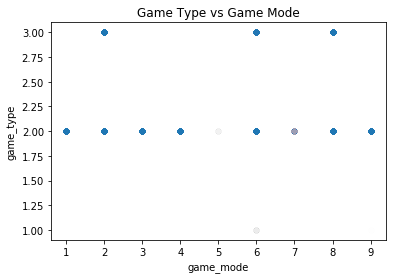

In [23]:
plt.plot(data['game_mode'], data['game_type'], 'o', alpha = 0.002)
plt.xlabel('game_mode')
plt.ylabel('game_type')
plt.title('Game Type vs Game Mode')
pass

На данном графике мы можем видеть, что очень редко выбирают пары (game_mode, game_type): (5, 2), (6, 1)  
Наиболее часто сочетания: (1, 4), (2, 2), (2, 3), (3, 2), (4, 2), (6, 2), (6, 3), (8, 3), (8, 3), (9, 2)  
Также встречается сочетание (7, 2), но не очень часто и неочень редко  
Вероятно, что других сочетаний не встречается. Чтобы это проверить увеличим alpha параметр и посмотрим на график.

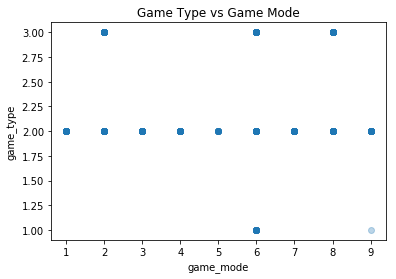

In [24]:
plt.plot(data['game_mode'], data['game_type'], 'o', alpha = 0.3)
plt.xlabel('game_mode')
plt.ylabel('game_type')
plt.title('Game Type vs Game Mode')
pass

Можем заметить, что также встречается сочетание (9, 1), но гораздо реже, чем сотальные возможные варианты. Учитывая, что прозрачность точек - 0.3 то, даже если была бы хотябы одна точка в любом другом месте, то мы бы ее заметили, поэтому можем полагать, что другие варианты невозможны. 

In [25]:
data['game_mode'] == 2

0         True
1         True
2         True
3         True
4         True
5         True
6        False
7        False
8         True
9         True
10        True
11        True
12        True
13        True
14        True
15        True
16        True
17        True
18        True
19       False
20        True
21        True
22        True
23        True
24       False
25        True
26        True
27        True
28        True
29       False
         ...  
10264    False
10265     True
10266     True
10267     True
10268     True
10269     True
10270     True
10271     True
10272     True
10273     True
10274     True
10275     True
10276    False
10277     True
10278     True
10279    False
10280     True
10281     True
10282     True
10283     True
10284     True
10285     True
10286    False
10287     True
10288     True
10289     True
10290    False
10291    False
10292     True
10293     True
Name: game_mode, Length: 102944, dtype: bool

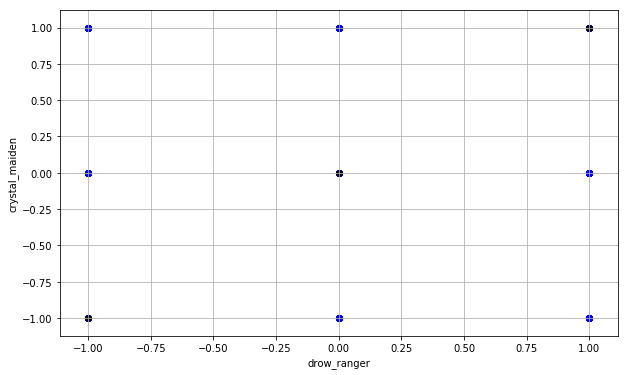

In [26]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['team_win'] == 1]['drow_ranger'],
            data[data['team_win'] == 1]['crystal_maiden'],
            alpha = 0.015,
            label = 'Team 1 Win',
            color = 'b')

plt.scatter(data[data['team_win'] == -1]['crystal_maiden'],
            data[data['team_win'] == -1]['crystal_maiden'],
            alpha = 0.005,
            label = 'Team -1 Win',
            color = 'red')

plt.xlabel('drow_ranger')
# plt.xticks(range(18))
# plt.xlim(0, 17)
plt.ylabel('crystal_maiden')
# plt.legend()
plt.grid()

Довольно сложно что-то понять по этому графику, но, видится, что вторая команда выигрывала чаще, если оба персонажа были выбраны в одну команду, либо не выбраны вообще. Либо может быть такая ситуация, что в колонке team_win -1 встречается в принципе реже и поэтому мы можем наблюдать такие результаты. Для проверки этой теории, мы можем увеличить alpha и красной части графика и уменьшим у синей до минимума или полупрозрачности.

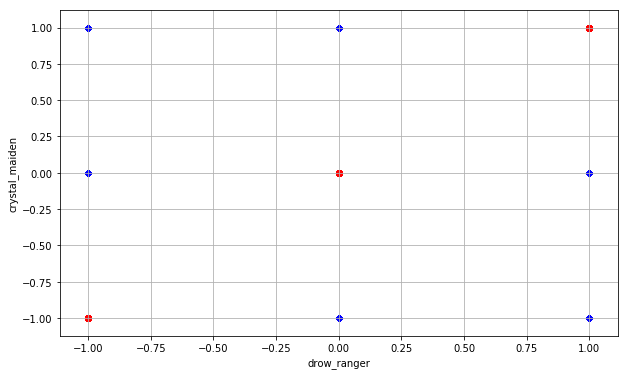

In [27]:
plt.figure(figsize = (10, 6))

plt.scatter(data[data['team_win'] == 1]['drow_ranger'],
            data[data['team_win'] == 1]['crystal_maiden'],
            alpha = 0.002,
            label = 'Team 1 Win',
            color = 'b')

plt.scatter(data[data['team_win'] == -1]['crystal_maiden'],
            data[data['team_win'] == -1]['crystal_maiden'],
            alpha = 0.5,
            label = 'Team -1 Win',
            color = 'red')

plt.xlabel('drow_ranger')
# plt.xticks(range(18))
# plt.xlim(0, 17)
plt.ylabel('crystal_maiden')
# plt.legend()
plt.grid()

Судя по данному результату предопложение было верно.

Все признаки с целыми значениями (т.е. все, тк они нормализоыанные)

In [28]:
data.describe(include = ['int'])

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,...,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.0,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,175.876156,3.319931,2.384986,-0.001622,-0.000583,0.000602,-0.000719,-0.002399,0.002924,...,-0.000806,-0.001059,-0.000457,0.000729,0.000447,0.0,0.000991,0.000855,-0.000291,-0.000078
std,0.998511,35.661004,2.635202,0.486993,0.401622,0.467470,0.165803,0.354597,0.329704,0.483529,...,0.254143,0.534819,0.205964,0.284102,0.155024,0.0,0.220649,0.204709,0.168823,0.189020
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [29]:
data.describe(include = 'all')

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
count,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,...,102944.000000,102944.000000,102944.000000,102944.000000,102944.000000,102944.0,102944.000000,102944.000000,102944.000000,102944.000000
mean,0.054632,175.876156,3.319931,2.384986,-0.001622,-0.000583,0.000602,-0.000719,-0.002399,0.002924,...,-0.000806,-0.001059,-0.000457,0.000729,0.000447,0.0,0.000991,0.000855,-0.000291,-0.000078
std,0.998511,35.661004,2.635202,0.486993,0.401622,0.467470,0.165803,0.354597,0.329704,0.483529,...,0.254143,0.534819,0.205964,0.284102,0.155024,0.0,0.220649,0.204709,0.168823,0.189020
min,-1.000000,111.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,152.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,1.000000,156.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,1.000000,223.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
max,1.000000,261.000000,9.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


In [30]:
np.sort(data['game_mode'].unique())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
np.sort(data['game_type'].unique())

array([1, 2, 3])

In [32]:
# for name in data['education'].unique():
#     print(name, data['education-num'][data['education'] == name].iloc[0])

In [33]:
# data['native-country'].unique()

# Готовим данные

Категориальные и дискретные признаки уже для нас подготовили в dataset, поэтому они не требуют подготовки.

In [34]:
#categorical_columns = []
#numerical_columns = []
#for c in data.columns:
#    if data[c].dtype.name == 'object':
#        categorical_columns.append(c)
#    else:
#        numerical_columns.append(c)          

In [35]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

[]
['team_win', 'cluster_id', 'game_mode', 'game_type', 'antimage', 'axe', 'bane', 'bloodseeker', 'crystal_maiden', 'drow_ranger', 'earthshaker', 'juggernaut', 'mirana', 'nevermore', 'morphling', 'phantom_lancer', 'puck', 'pudge', 'razor', 'sand_king', 'storm_spirit', 'sven', 'tiny', 'vengefulspirit', 'windrunner', 'zuus', 'kunkka', 'lina', 'lich', 'lion', 'shadow_shaman', 'slardar', 'tidehunter', 'witch_doctor', 'riki', 'enigma', 'tinker', 'sniper', 'necrolyte', 'warlock', 'beastmaster', 'queenofpain', 'venomancer', 'faceless_void', 'skeleton_king', 'death_prophet', 'phantom_assassin', 'pugna', 'templar_assassin', 'viper', 'luna', 'dragon_knight', 'dazzle', 'rattletrap', 'leshrac', 'furion', 'life_stealer', 'dark_seer', 'clinkz', 'omniknight', 'enchantress', 'huskar', 'night_stalker', 'broodmother', 'bounty_hunter', 'weaver', 'jakiro', 'batrider', 'chen', 'spectre', 'doom_bringer', 'ancient_apparition', 'ursa', 'spirit_breaker', 'gyrocopter', 'alchemist', 'invoker', 'silencer', 'obsid

## Обрабатываем пропущенные значения
Заполним пропущенных значений для каждой количественной переменной их  медианным значением.

In [36]:
data.median(axis = 0)

team_win                 1.0
cluster_id             156.0
game_mode                2.0
game_type                2.0
antimage                 0.0
axe                      0.0
bane                     0.0
bloodseeker              0.0
crystal_maiden           0.0
drow_ranger              0.0
earthshaker              0.0
juggernaut               0.0
mirana                   0.0
nevermore                0.0
morphling                0.0
phantom_lancer           0.0
puck                     0.0
pudge                    0.0
razor                    0.0
sand_king                0.0
storm_spirit             0.0
sven                     0.0
tiny                     0.0
vengefulspirit           0.0
windrunner               0.0
zuus                     0.0
kunkka                   0.0
lina                     0.0
lich                     0.0
lion                     0.0
                       ...  
ogre_magi                0.0
undying                  0.0
rubick                   0.0
disruptor     

In [37]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [38]:
data[numerical_columns].count(axis = 0)

team_win               102944
cluster_id             102944
game_mode              102944
game_type              102944
antimage               102944
axe                    102944
bane                   102944
bloodseeker            102944
crystal_maiden         102944
drow_ranger            102944
earthshaker            102944
juggernaut             102944
mirana                 102944
nevermore              102944
morphling              102944
phantom_lancer         102944
puck                   102944
pudge                  102944
razor                  102944
sand_king              102944
storm_spirit           102944
sven                   102944
tiny                   102944
vengefulspirit         102944
windrunner             102944
zuus                   102944
kunkka                 102944
lina                   102944
lich                   102944
lion                   102944
                        ...  
ogre_magi              102944
undying                102944
rubick    

In [39]:
data

,team_win,cluster_id,game_mode,game_type,antimage,axe,bane,bloodseeker,crystal_maiden,drow_ranger,...,legion_commander,ember_spirit,earth_spirit,abyssal_underlord,terrorblade,phoenix,techies,oracle,winter_wyvern,arc_warden
0,-1,223,2,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,152,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
2,1,131,2,2,0,0,0,1,0,-1,...,0,0,0,0,0,0,0,0,0,0
3,1,154,2,2,0,0,0,0,0,0,...,0,-1,0,0,0,0,0,0,0,0
4,-1,171,2,3,0,0,0,0,0,-1,...,0,0,0,0,0,0,0,0,0,0
5,1,122,2,3,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,1,224,8,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,-1,227,8,3,0,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,-1,111,2,3,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,-1,151,2,2,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


# X и y

In [40]:
corr = data.corr()
drop_columns = corr[abs(corr['team_win']) < 0.005].index

print(len(drop_columns))
print(drop_columns)

25
Index(['cluster_id', 'game_mode', 'game_type', 'earthshaker', 'nevermore',
       'sand_king', 'slardar', 'witch_doctor', 'necrolyte', 'skeleton_king',
       'dazzle', 'rattletrap', 'leshrac', 'dark_seer', 'clinkz', 'broodmother',
       'jakiro', 'lycan', 'shadow_demon', 'meepo', 'rubick', 'naga_siren',
       'wisp', 'centaur', 'techies'],
      dtype='object')


In [41]:
y_column = 'team_win'
size = round(len(data) / 10) # уменьшим размер выборки, чтобы классификатору проще было обучаться (не подойдет для реальной задачи)
data = data[:size]

X = data.drop(columns=[y_column], axis = 1) # выбрасываем столбец 'team_win'
X = X.drop(columns=drop_columns, axis = 1) # выбрасываем столбец 'team_win'

y = data[y_column]
feature_names = X.columns


In [42]:
type(feature_names)

pandas.core.indexes.base.Index

In [43]:
feature_names

Index(['antimage', 'axe', 'bane', 'bloodseeker', 'crystal_maiden',
       'drow_ranger', 'juggernaut', 'mirana', 'morphling', 'phantom_lancer',
       'puck', 'pudge', 'razor', 'storm_spirit', 'sven', 'tiny',
       'vengefulspirit', 'windrunner', 'zuus', 'kunkka', 'lina', 'lich',
       'lion', 'shadow_shaman', 'tidehunter', 'riki', 'enigma', 'tinker',
       'sniper', 'warlock', 'beastmaster', 'queenofpain', 'venomancer',
       'faceless_void', 'death_prophet', 'phantom_assassin', 'pugna',
       'templar_assassin', 'viper', 'luna', 'dragon_knight', 'furion',
       'life_stealer', 'omniknight', 'enchantress', 'huskar', 'night_stalker',
       'bounty_hunter', 'weaver', 'batrider', 'chen', 'spectre',
       'doom_bringer', 'ancient_apparition', 'ursa', 'spirit_breaker',
       'gyrocopter', 'alchemist', 'invoker', 'silencer', 'obsidian_destroyer',
       'brewmaster', 'lone_druid', 'chaos_knight', 'treant', 'ogre_magi',
       'undying', 'disruptor', 'nyx_assassin', 'keeper_of_the_l

In [44]:
print(X.shape)
print(y.shape)
N, d = X.shape

(10294, 90)
(10294,)


In [45]:
type(X)

pandas.core.frame.DataFrame

In [46]:
type(y)

pandas.core.series.Series

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

7205 3089


In [48]:
72060 + 30884

102944

# $k$NN

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [50]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [51]:
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.35128383067314367 0.46876011654257044


In [52]:
from sklearn.metrics import confusion_matrix

mtx = confusion_matrix(y_test, y_test_predict)

print(mtx)

[[820 590]
 [858 821]]


In [53]:
for i in range(0, len(mtx)):
    print(mtx[i][i] * 100 / sum(mtx[i]))

58.156028368794324
48.89815366289458


Судя по результатам ошибки и confusion_matrix, данный классификатор довольно плохо справился с предсказанием того, какая команда выйграет при тех или иных параметрах.

Классификатор угадал 58% выйгрышей команды 1 и 49% выйгрышей команды -1. Логично предопложить, что вероятность, что он попадет в точку:

Результат показывает чуть больше 50% успеха, что не очень хороший показатель.

Посмотрим, как ведет себя классификатор при увеличении или уменьшении числа соседей:

### Подбор параметров

In [54]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.46134628730048577 35


In [55]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.4029146426092991 0.44189057947555843


Из представленных вариантов классификатор показал лучший вариант на 35 соседях. Тк были выбраны еще 35 и 45 соседей для проверки и на них классификатор работал хуже, то имеет смысл рассмотреть промежуток между 25 и 45.

In [56]:
nnb = range(25, 46)
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.45607217210270645 40


In [57]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(err_train, err_test)

0.4070784177654407 0.4460990611848495


In [58]:
from sklearn.metrics import confusion_matrix

mtx = confusion_matrix(y_test, y_test_predict)

print(mtx)

[[ 632  778]
 [ 600 1079]]


In [59]:
for i in range(0, len(mtx)):
    print(mtx[i][i] * 100 / sum(mtx[i]))

44.822695035460995
64.2644431209053


Итересно заметить, что при 40 соседях классификатор показывает даже немного зуже результат, чем на 35, хотя, какзалось бы, GridSearch должен подобрать наилучшие параметры из представленных.

**Что еще иметт смысл сделать?**

* Думаю, что имело бы смысл представить game_mode и game_type, как набор бинарных параметров
* Попробовать классификатор на еще большем числе соседей
* Думаю, имеет смысл в будущем использовать последовательность Фибоначчи для варьирования параметров (выглядит очень перспективно, поскольку, предположительно, позволит лучше понять поведение функции ошибки)